In [310]:
# importing necessary packages
import pandas as pd
import numpy as np
from random import sample
from numpy.random import uniform
from math import isnan
pd.set_option('display.max_columns', 50)
sns.set_style('darkgrid')

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [244]:
# read the dataset
df = pd.read_csv('Country-data.csv')

In [245]:
# checking the head of the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [246]:
# checking the data for `data-type` and `null values`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [247]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


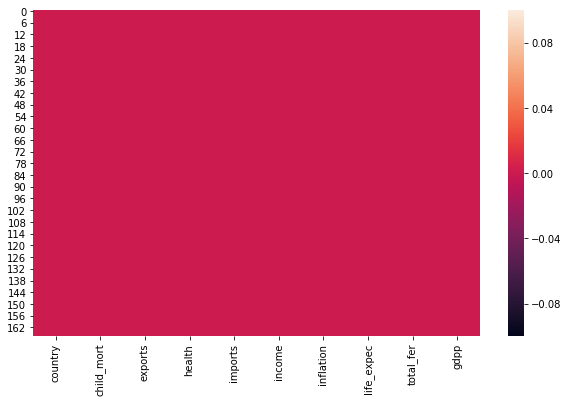

In [248]:
# checking the null values in the data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [249]:
# all the columns in the dataset
list(df.columns)

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

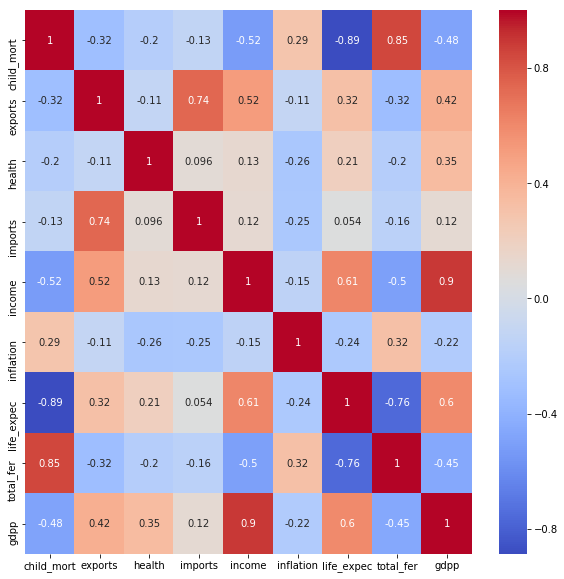

In [250]:
# plotting the correlation matrix of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [251]:
# getting all the correlated data columns
corr_values = df.corr().abs()
corr_values_unstacked = corr_values.unstack()
sorted_corr_vals = corr_values_unstacked.sort_values(kind='quicksort', ascending=False)

In [252]:
top_5_corr = sorted_corr_vals[len(df.columns): len(df.columns)+5]

In [253]:
top_5_corr.index[1]
all_high_corr_cols = list(set(list(pd.DataFrame(related_cols).values.reshape(-1))))

In [254]:
# all the highly correlated data columns
# columns with absolute correlation above 0.8
top_5_corr

income      gdpp          0.895571
life_expec  child_mort    0.886676
child_mort  life_expec    0.886676
            total_fer     0.848478
total_fer   child_mort    0.848478
dtype: float64

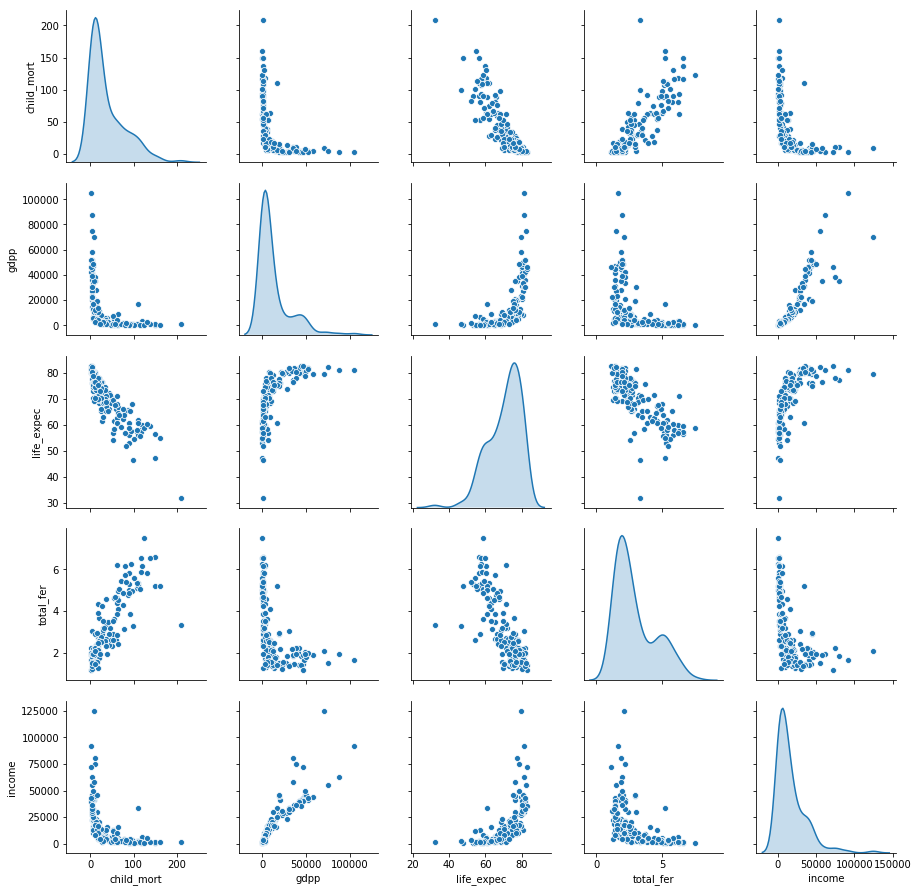

In [255]:
# visualizing the all the highly correlated data columns
sns.pairplot(df[all_high_corr_cols], diag_kind='kde')

In [256]:
# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('country', axis=1))

D:\anaconda\envs\deep-work\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\envs\deep-work\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [257]:
# Applying PCA decomposition on all the scaled data
decomposer = PCA(n_components=2)
df_pca = decomposer.fit_transform(df_scaled)

Text(0.5, 1.0, 'All columns Decomposed using PCA')

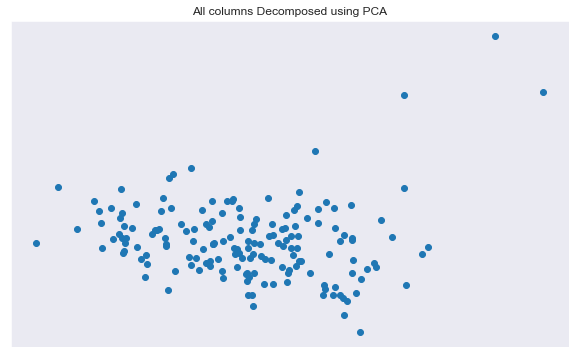

In [311]:
plt.figure(figsize=(10,6))
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xticks([],[])
plt.yticks([],[])
plt.title('All columns Decomposed using PCA')

In [259]:
# getting the highly correlated column indices
high_corr_col_indices = [df.columns.get_loc(c)-1 for c in all_high_corr_cols]

In [260]:
df_scaled_corr_cols = df_scaled[:,high_corr_col_indices]

In [261]:
# Applying PCA decomposition on the highly correlated scaled data
decomposer = PCA(n_components=2)
df_pca_corr = decomposer.fit_transform(df_scaled_corr_cols)

Text(0.5, 1.0, 'Top 5 Correlated columns Decomposed using PCA')

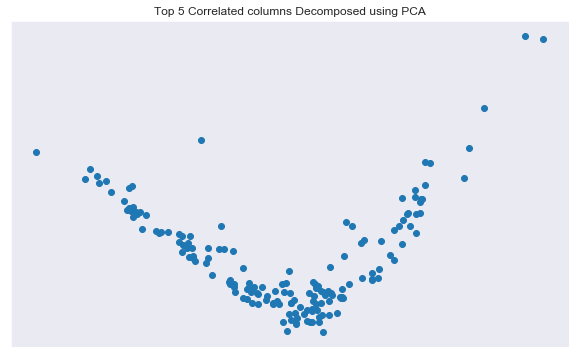

In [312]:
plt.figure(figsize=(10,6))
plt.scatter(df_pca_corr[:,0], df_pca_corr[:,1])
plt.xticks([],[])
plt.yticks([],[])
plt.title('Top 5 Correlated columns Decomposed using PCA')

In [263]:
def hopkins(X):
    '''
    Statistic method if the data has a cluster tendency.
    
    For Hopkin's value between: 
    ->  (0.01 , 0.3) - Regularly spaced data.
    -> ~0.5 - It is random.
    -> (0.7 , 0.99} - High tendency to cluster.
    '''
    X = pd.DataFrame(X)
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [264]:
# hopkin's value of all the data
hopkins(df_scaled)

0.8249695400361905

In [265]:
# hopkin's value of highly-correlated columns taken in the data
hopkins(df_scaled_corr_cols)

0.9056699075640784

#### Choosing the right no of PCA components

In [266]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(df_scaled_corr_cols)

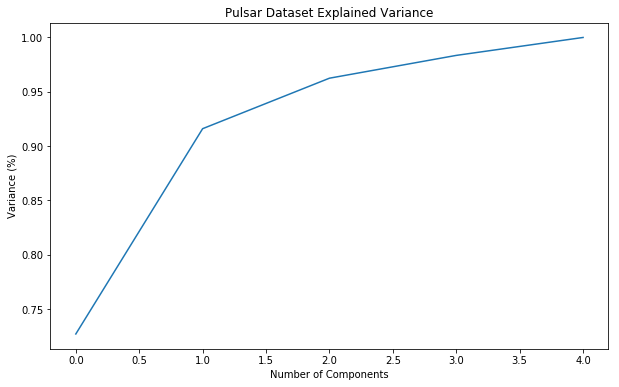

In [267]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [268]:
#### We will choose the Number of PCA components=5

In [269]:
# getting the final PCA
pca_final = PCA(n_components=4).fit_transform(df_scaled_corr_cols)

In [270]:
def doKmeans(X, k=2):
    '''
    Manually selecting `k` for clustering.
    Returns cluster labels and  cluster centers
    '''
    model = KMeans(k)
    
    # performing k-means
    model.fit(X)
    
    # getting the cluster labels for the data
    clust_labels = model.predict(X)
    
    # centroids
    cent = model.cluster_centers_
    
    return (clust_labels, cent)

In [271]:
cl_lbs, centroids = doKmeans(pca_final, k=6)

In [272]:
# plotting the silhouette score for each value of `k`
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_final)
    sse_.append([k, silhouette_score(pca_final, kmeans.labels_)])

#### Choosing k=9 clusters from the Silhouette Score as it has the highest variance at k=9 so that we can form more meaningful clusters

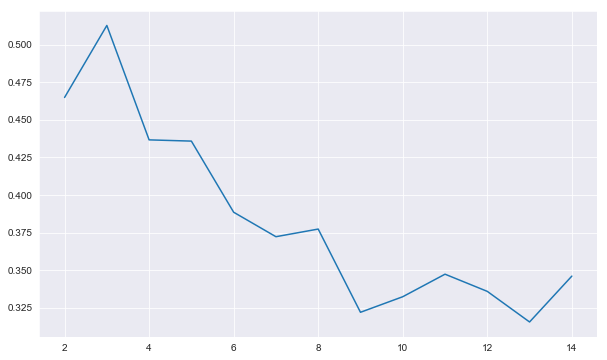

In [313]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Sum of Squared Distances

In [280]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_final)
    ssd.append(model_clus.inertia_)

#### Choosing k=2 clusters from the "Sum of Squared Distances"(Elbow method)  as the elbow is at k=2

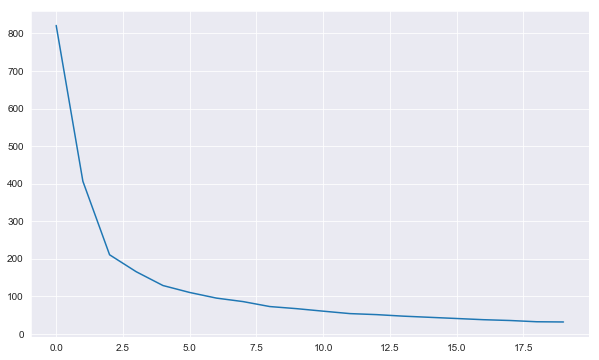

In [314]:
plt.figure(figsize=(10,6))
plt.plot(ssd)

In [303]:
colors = np.array([x for x in 'bgrcmykw'])
colors = np.hstack([colors])

In [358]:
def plot_kmeans(dim0=0, dim1=1, lbl=k9_lbl, data=pca_final):
    
    label_color = [LABEL_COLOR_MAP[l] for l in lbl]
    plt.figure(figsize=(10,6))
    plt.scatter(data[:,dim0], data[:,dim1])
    plt.scatter(data[:, dim0], data[:, dim1], s=100, c=label_color)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.show()

### K=9

In [359]:
LABEL_COLOR_MAP = {}
for i in range(len(colors)):
    LABEL_COLOR_MAP[i] = colors[i]
LABEL_COLOR_MAP[i+1] = 'burlywood'

In [360]:
k9_lbl, k9_cent = doKmeans(pca_final, 9)

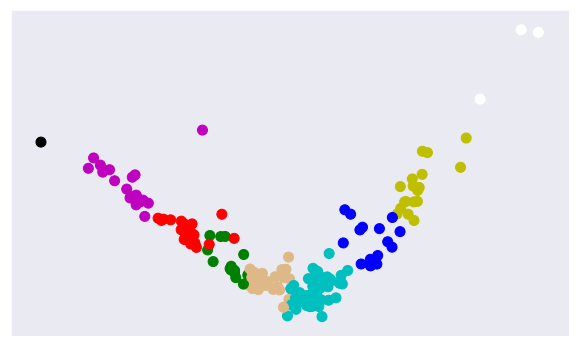

In [361]:
plot_kmeans(0, 1, lbl=k9_lbl)

#### Visualizing the raw data with K=9

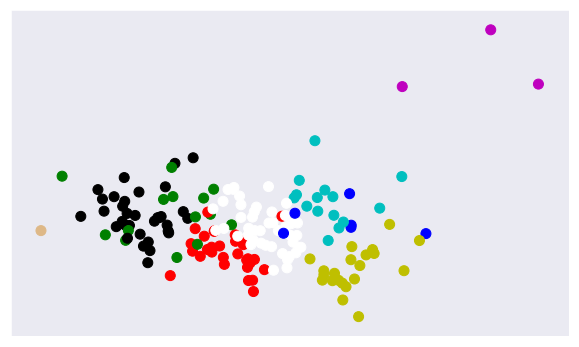

In [362]:
k9_raw_lbl, k9_raw_cent = doKmeans(df_scaled, 9)
pca_k9_raw = PCA(n_components=2).fit_transform(df_scaled)
plot_kmeans(0, 1, k9_raw_lbl, data=pca_k9_raw)

### K=3

In [364]:
k3_lbl, k3_cent = doKmeans(pca_final, 3)

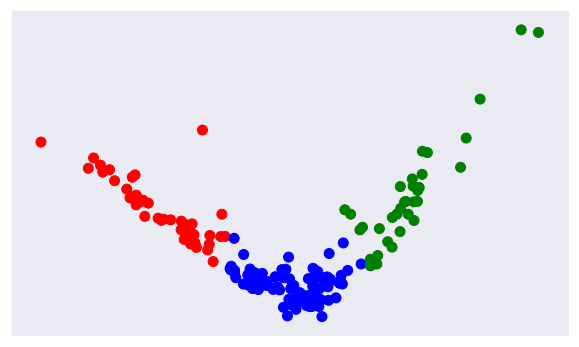

In [365]:
plot_kmeans(0, 1, k3_lbl)

#### Visualizing the raw data with K=3

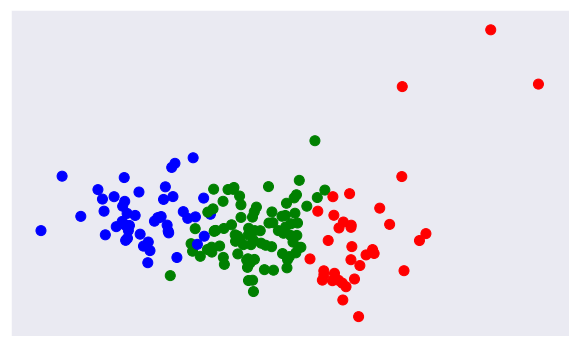

In [366]:
k3_raw_lbl, k3_raw_cent = doKmeans(df_scaled, 3)
pca_k3_raw = PCA(n_components=2).fit_transform(df_scaled)
plot_kmeans(0, 1, k3_raw_lbl, data=pca_k3_raw)

In [374]:
data_3_clusters = pd.DataFrame(df.country)
data_3_clusters['cluster_no'] = k3_lbl

In [383]:
# 3-clustered countries
country_3_clusters = {}
for i in data_3_clusters.cluster_no.unique():
    country_3_clusters[i] = list(data_3_clusters\
                    .country[data_3_clusters.cluster_no==i])

### After forming 3 clusters, we find that countries clustered based on 3 states of Economy: Poorly developed, Developing & Developed

#### poor developed countries:

In [394]:
country_3_clusters[2]

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

#### Developing countries:

In [396]:
country_3_clusters[0]

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 '

#### Developed countries:

In [397]:
country_3_clusters[1]

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Portugal',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']